# Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, \
    X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1 = load_processed_data('input')

y_train, y_test = load_processed_data('output')

%matplotlib inline

Select dataset:

In [2]:
X_train = X_train_bow_L1
X_test = X_test_bow_L1

# Basic training

In [3]:
softmax_model = LogisticRegression(multi_class='multinomial')
softmax_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Score of on train are:
	- Accuracy score: 0.9750
	- Micro F1 score: 0.9750
	- Macro F1 score: 0.9670
Score of on test are:
	- Accuracy score: 0.8670
	- Micro F1 score: 0.8670
	- Macro F1 score: 0.8261


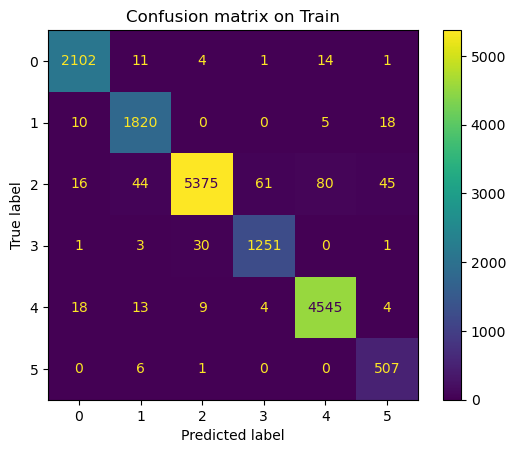

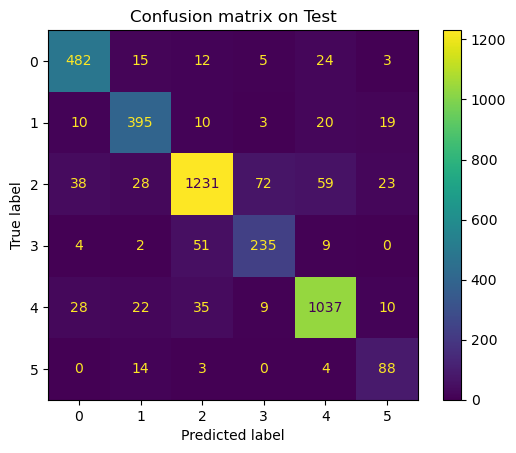

In [4]:
evaluate_model(softmax_model, X_train, X_test, y_train, y_test, include_training=True)

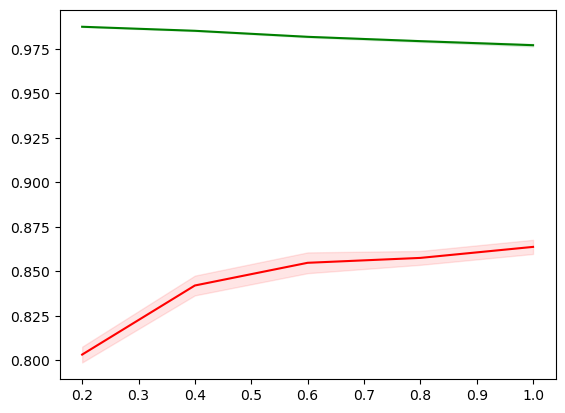

In [5]:
draw_learning_curve(softmax_model, X_train, y_train)

# Multiple tuning

## No regularization

In [6]:
softmax_model = LogisticRegression(penalty=None, solver='lbfgs', multi_class='multinomial')
softmax_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', penalty=None)

Score of on train are:
	- Accuracy score: 0.9864
	- Micro F1 score: 0.9864
	- Macro F1 score: 0.9824
Score of on test are:
	- Accuracy score: 0.8510
	- Micro F1 score: 0.8510
	- Macro F1 score: 0.8093


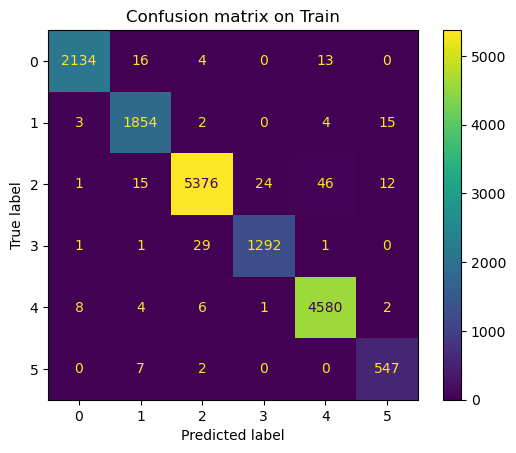

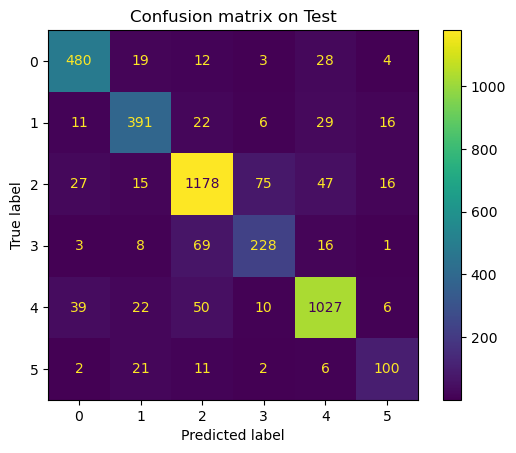

In [7]:
evaluate_model(softmax_model, X_train, X_test, y_train, y_test, include_training=True)

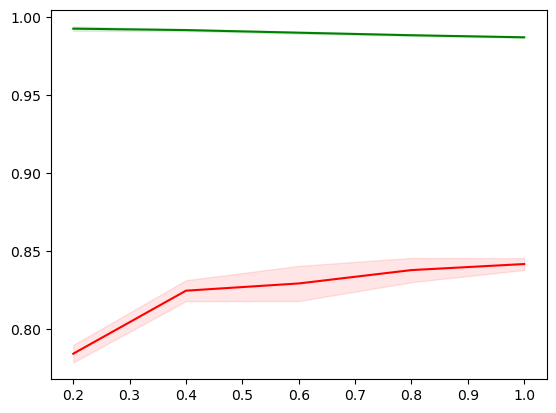

In [8]:
draw_learning_curve(softmax_model, X_train, y_train)

## L1 regularization

First, we try to plot the validation score through a list of C from 0.001 to 100

In [10]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l1', solver='saga', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.3386875, 0.338625, 0.849625, 0.9138125, 0.97325, 0.9765, 0.978875]
[0.3386875000000001, 0.33831249999999996, 0.828375, 0.86675, 0.8651875, 0.8651249999999999, 0.8640625]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

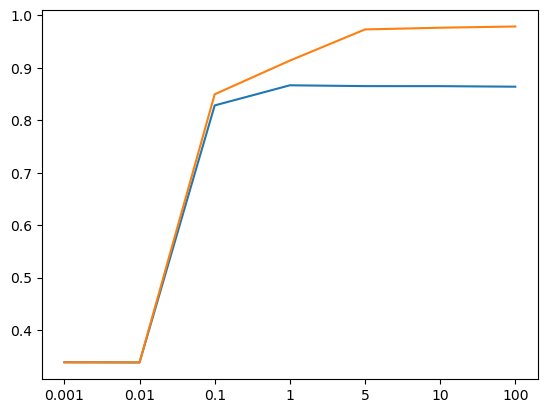

In [12]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We can see the good value of $C$ is near $C = $, then we scope to $C=$:

In [ ]:
C_list = []

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l1', solver='saga', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

In [ ]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=$ to be the best model.

In [27]:
best_l1_softmax_model = LogisticRegression(C=1, penalty='l1', solver='saga', multi_class='multinomial')

SyntaxError: invalid syntax (123020755.py, line 1)

In [ ]:
best_l1_softmax_model.fit(X_train, y_train)
evaluate_model(best_l1_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

In [ ]:
draw_learning_curve(best_l1_softmax_model, X_train, y_train)

## L2 regularization

In [13]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100, 200]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100, 200]
[0.3876875, 0.6714375, 0.91875, 0.975, 0.98475, 0.985375, 0.9863125, 0.9863125]
[0.36081250000000004, 0.6063125, 0.8438749999999999, 0.8637500000000001, 0.8614375000000001, 0.8579375, 0.8466250000000001, 0.8466875]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100'),
 Text(7, 0, '200')]

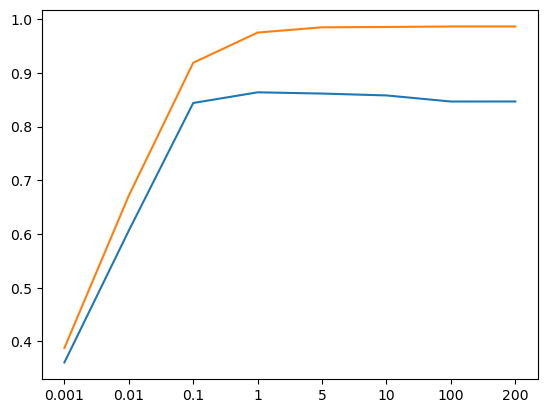

In [14]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We can see the good value of $C$ is near $C = $, then we scope to $C=$:

In [ ]:
C_list = []

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

In [ ]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=$ to be the best model.

In [ ]:
best_l2_softmax_model = LogisticRegression(C=1, penalty='l2', solver='lbfgs', multi_class='multinomial')

In [ ]:
best_l2_softmax_model.fit(X_train, y_train)
evaluate_model(best_l2_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

In [ ]:
draw_learning_curve(best_l2_softmax_model, X_train, y_train)

## Elastic regularization

In [4]:
dict_param = {
    'C' : [0.001, 0.01, 0.1, 1, 5, 10, 100],
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

softmax_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial')
grid_search = GridSearchCV(softmax_model, dict_param, scoring='accuracy', cv=5, n_jobs=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=5,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [5]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
df = df[df['score'] < 0.8]
print("Bad hyperparameter:")
for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 35 // len(dict_param[param]):
      print(param, value)

Bad hyperparameter:
C 0.001
C 0.01


In [ ]:
dict_param = {
    'C' : np.logspace(0, 2, 5),
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

softmax_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial')
grid_search = GridSearchCV(softmax_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
print(df)

In [ ]:
print(grid_search.best_estimator_, grid_search.best_score_)

In [ ]:
best_en_softmax_model = LogisticRegression(C=3.1622776601683795, l1_ratio=0.9,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga')

In [ ]:
best_en_softmax_model.fit(X_train, y_train)
evaluate_model(best_en_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

In [ ]:
draw_learning_curve(best_en_softmax_model, X_train, y_train)

# Conclusion

There are a few difference among the accuracy of these 3 regularization. However, Elastic-net regularization gives the best performance then I will choose it to be the best model in this notebook.

In [ ]:
best_softmax_model = best_en_softmax_model

In [ ]:
directory = "data/models/softmax/"

dump(best_softmax_model, directory + "best_softmax_bow_l1_model.joblib")